In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('corona_morocco.csv', sep=',')
df

,Date,Confirmed,Deaths,Recovered,Excluded,Beni Mellal-Khenifra,Casablanca-Settat,Draa-Tafilalet,Dakhla-Oued Ed-Dahab,Fes-Meknes,Guelmim-Oued Noun,Laayoune-Sakia El Hamra,Marrakesh-Safi,Oriental,Rabat-Sale-Kenitra,Souss-Massa,Tanger-Tetouan-Al Hoceima
0,02/03/2020,1.0,NaN,NaN,28.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,03/03/2020,NaN,NaN,NaN,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,04/03/2020,2.0,NaN,NaN,34.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,05/03/2020,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06/03/2020,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


L'objectif de ce projet est d'étudier les tendances des cas de COVID-19 au Maroc et de déterminer les facteurs influençant leur évolution, tels que les mesures de confinement et les variants du virus. En parallèle, nous visons à concevoir un modèle de prédiction pour les nouveaux cas de COVID-19. Une fois le modèle développé, nous évaluerons ses performances et analyserons les résultats obtenus pour en tirer des conclusions pertinentes.

-	Objectifs du projet : 

   - Développer une compréhension approfondie d'une problématique spécifique liée à votre domaine d'intérêt. 
   - Acquérir des compétences pratiques dans l'application de techniques de Machine Learning pour résoudre des problèmes réels. 
   - Pratiquer la méthodologie de projet, de la formulation de la question de recherche à la présentation des résultats.


Analyse des tendances des cas de COVID-19 au Maroc

In [2]:
# Afficher les informations du dataset
df.info()
# Afficher des statistiques descriptives
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       181 non-null    object 
 1   Confirmed                  172 non-null    float64
 2   Deaths                     161 non-null    float64
 3   Recovered                  160 non-null    float64
 4   Excluded                   169 non-null    float64
 5   Beni Mellal-Khenifra       158 non-null    float64
 6   Casablanca-Settat          161 non-null    float64
 7   Draa-Tafilalet             158 non-null    float64
 8   Dakhla-Oued Ed-Dahab       158 non-null    float64
 9   Fes-Meknes                 159 non-null    float64
 10  Guelmim-Oued Noun          158 non-null    float64
 11  Laayoune-Sakia El Hamra    158 non-null    float64
 12  Marrakesh-Safi             160 non-null    float64
 13  Oriental                   158 non-null    float64

,Confirmed,Deaths,Recovered,Excluded,Beni Mellal-Khenifra,Casablanca-Settat,Draa-Tafilalet,Dakhla-Oued Ed-Dahab,Fes-Meknes,Guelmim-Oued Noun,Laayoune-Sakia El Hamra,Marrakesh-Safi,Oriental,Rabat-Sale-Kenitra,Souss-Massa,Tanger-Tetouan-Al Hoceima
count,172.000000,161.000000,160.000000,1.690000e+02,158.000000,161.000000,158.000000,158.000000,159.000000,158.000000,158.000000,160.000000,158.000000,158.000000,158.000000,158.000000
mean,12307.511628,253.596273,9317.731250,5.027283e+05,270.797468,3600.726708,584.563291,38.411392,1847.440252,77.854430,317.886076,2200.456250,272.512658,1406.436709,125.575949,2509.696203
std,13315.427530,195.242746,9810.946407,5.582560e+05,470.530325,3628.310094,417.300445,71.666703,2096.018349,69.816121,399.128333,2097.242973,224.093979,1281.004276,173.071183,2748.737266
min,1.000000,1.000000,1.000000,2.800000e+01,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,16.000000,6.000000,4.000000
25%,2998.250000,165.000000,890.500000,1.643900e+04,80.750000,1086.000000,542.250000,2.000000,545.000000,29.000000,4.000000,925.250000,175.000000,317.000000,51.000000,602.500000
50%,7849.500000,208.000000,7386.000000,2.399020e+05,126.000000,2767.000000,586.000000,5.000000,1026.000000,45.000000,5.000000,1465.500000,195.000000,776.500000,89.000000,1203.000000
75%,16138.250000,264.000000,14425.000000,9.177860e+05,184.750000,4062.000000,589.000000,35.750000,2081.000000,151.250000,822.750000,2956.250000,335.750000,2103.250000,104.000000,3443.000000
max,55864.000000,984.000000,40586.000000,1.768387e+06,2453.000000,15911.000000,2067.000000,325.000000,8425.000000,235.000000,995.000000,8967.000000,1051.000000,5084.000000,961.000000,9386.000000


Nettoyage et prétraitement des données

In [3]:
# Convertir la colonne Date en datetime
df['Date'] = pd.to_datetime(df['Date'])

# Trier les données par date
df = df.sort_values('Date')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 30 to 193
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       181 non-null    datetime64[ns]
 1   Confirmed                  172 non-null    float64       
 2   Deaths                     161 non-null    float64       
 3   Recovered                  160 non-null    float64       
 4   Excluded                   169 non-null    float64       
 5   Beni Mellal-Khenifra       158 non-null    float64       
 6   Casablanca-Settat          161 non-null    float64       
 7   Draa-Tafilalet             158 non-null    float64       
 8   Dakhla-Oued Ed-Dahab       158 non-null    float64       
 9   Fes-Meknes                 159 non-null    float64       
 10  Guelmim-Oued Noun          158 non-null    float64       
 11  Laayoune-Sakia El Hamra    158 non-null    float64       
 12  Marrake

In [5]:
df = df.set_index('Date')

df.head()

,Confirmed,Deaths,Recovered,Excluded,Beni Mellal-Khenifra,Casablanca-Settat,Draa-Tafilalet,Dakhla-Oued Ed-Dahab,Fes-Meknes,Guelmim-Oued Noun,Laayoune-Sakia El Hamra,Marrakesh-Safi,Oriental,Rabat-Sale-Kenitra,Souss-Massa,Tanger-Tetouan-Al Hoceima
Date,,,,,,,,,,,,,,,,
2020-01-04,654.0,39.0,29.0,2691.0,21.0,181.0,20.0,0.0,110.0,1.0,2.0,115.0,29.0,113.0,17.0,45.0
2020-01-05,4569.0,171.0,1083.0,32437.0,83.0,1157.0,546.0,2.0,573.0,29.0,4.0,1004.0,175.0,326.0,51.0,619.0
2020-01-06,7833.0,205.0,5893.0,213721.0,119.0,2649.0,585.0,4.0,1001.0,43.0,4.0,1338.0,187.0,702.0,89.0,1103.0
2020-01-07,12636.0,228.0,9026.0,685492.0,152.0,3450.0,587.0,16.0,1292.0,75.0,535.0,1953.0,212.0,1973.0,93.0,2304.0
2020-01-08,25015.0,367.0,17960.0,1248924.0,276.0,6377.0,678.0,83.0,3858.0,161.0,839.0,3718.0,468.0,2522.0,136.0,5907.0


In [6]:
#adding actif case and total tests per day to the dataset
actif_column= df['Confirmed'] - df['Recovered'] - df['Deaths']
total_test_perDay = df['Confirmed'] + df['Excluded']
df['Actif'] = actif_column
df['Total Test'] = total_test_perDay

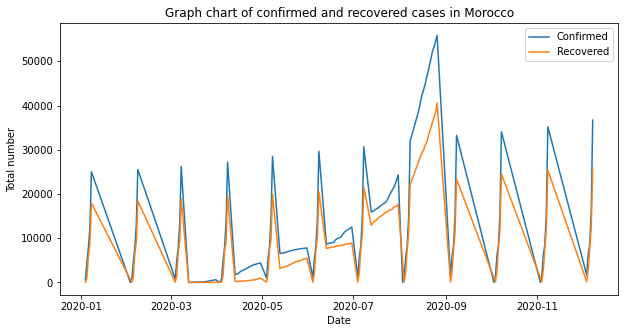

In [7]:
#Graphing the number of confirmed cases and recoveries.
import numpy as np 
import pandas as pd 
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

plt.figure(figsize=(10,5))
sns.lineplot(data = df['Confirmed'],label='Confirmed')
sns.lineplot(data = df['Recovered'],label='Recovered')
plt.xlabel('Date')
plt.ylabel('Total number')
plt.title('Graph chart of confirmed and recovered cases in Morocco')

plt.legend()

Repartition of new cases for rows 14 and 15 Avril on region are not available and that will affect our analysis

In [8]:
df['2020-04-13':'2020-04-16']

,Confirmed,Deaths,Recovered,Excluded,Beni Mellal-Khenifra,Casablanca-Settat,Draa-Tafilalet,Dakhla-Oued Ed-Dahab,Fes-Meknes,Guelmim-Oued Noun,Laayoune-Sakia El Hamra,Marrakesh-Safi,Oriental,Rabat-Sale-Kenitra,Souss-Massa,Tanger-Tetouan-Al Hoceima,Actif,Total Test
Date,,,,,,,,,,,,,,,,,,
2020-04-13,1763.0,126.0,203.0,7365.0,48.0,521.0,78.0,2.0,233.0,1.0,4.0,335.0,123.0,225.0,24.0,169.0,1434.0,9128.0
2020-04-14,1888.0,126.0,217.0,8034.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1545.0,9922.0
2020-04-15,2024.0,127.0,229.0,8626.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1668.0,10650.0
2020-04-16,2283.0,130.0,249.0,10388.0,56.0,681.0,80.0,2.0,317.0,1.0,4.0,487.0,140.0,258.0,27.0,230.0,1904.0,12671.0


In [9]:
#the optimal solution for the missing datas in this example is to drop them out.
df_ori = df.copy() # later we will need all Confirmed,Death and Recovered collumns for all date uncluding 14,15 April

df = df[df.index != '2020-04-14']
df = df[df.index != '2020-04-15']

Text(0, 0.5, 'Number of tests')

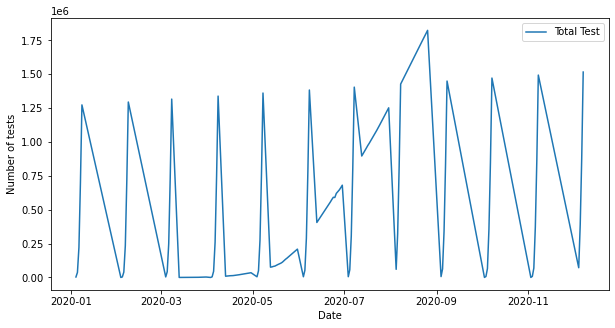

In [10]:
#Daily increases of total test
plt.figure(figsize=(10,5))
sns.lineplot(data = df['Total Test'],label='Total Test')
plt.xlabel('Date')
plt.ylabel('Number of tests')

<AxesSubplot:xlabel='Total Test', ylabel='Confirmed'>

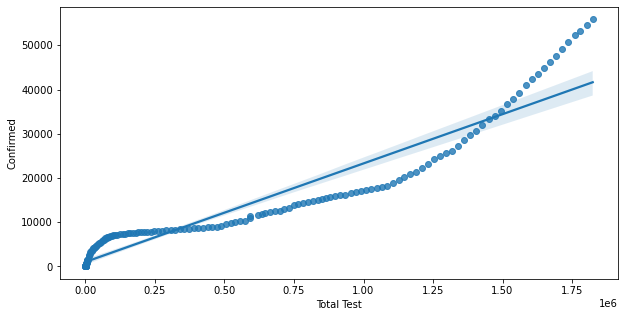

In [11]:
#Correlation between number of tests per day and the new confirmed cases
plt.figure(figsize=(10,5))
sns.regplot(x = df['Total Test'],y = df['Confirmed'])

Text(0.5, 1.0, 'Total cases evolution per region')

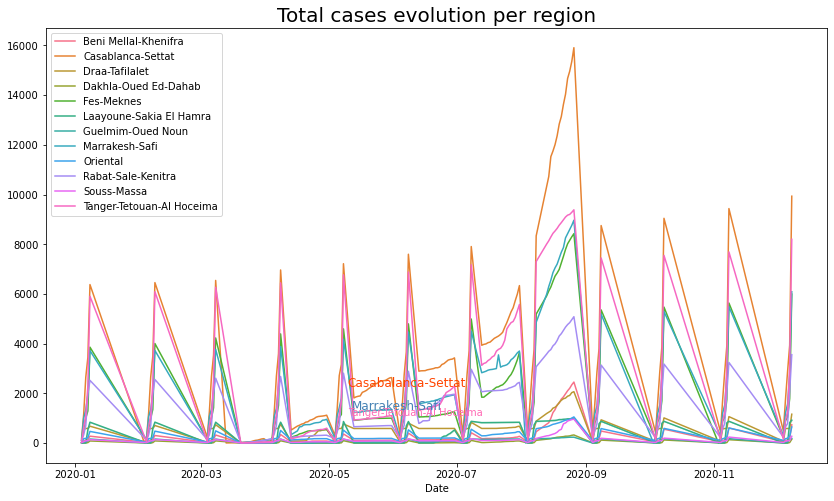

In [12]:
#Graphing the evolution of total cases per regions
Regions1 = ['Beni Mellal-Khenifra',
       'Casablanca-Settat', 'Draa-Tafilalet', 'Dakhla-Oued Ed-Dahab',
       'Fes-Meknes', 'Laayoune-Sakia El Hamra','Guelmim-Oued Noun', 'Laayoune-Sakia El Hamra',
       'Marrakesh-Safi', 'Oriental', 'Rabat-Sale-Kenitra', 'Souss-Massa','Tanger-Tetouan-Al Hoceima']


plt.figure(figsize=(14,8))
sns.lineplot(data = df[Regions1],dashes=False)
plt.text('2020-05-10', 2250, 'Casabalanca-Settat', fontsize=12,color='#ff4500')
plt.text('2020-05-12', 1350, 'Marrakesh-Safi', fontsize=12,color='#4682B4')
plt.text('2020-05-10', 1100, 'Tanger-Tetouan-Al Hoceima', fontsize=10,color='#FF69B4')
plt.title('Total cases evolution per region',fontsize = 20)

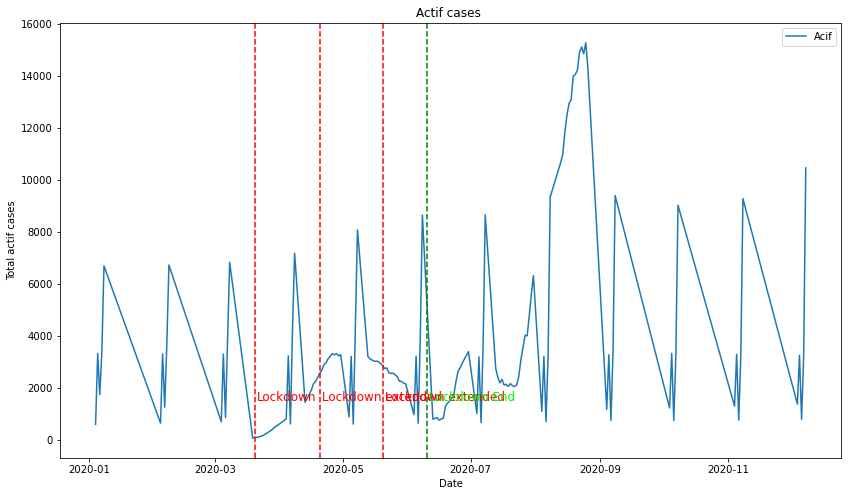

In [13]:
plt.figure(figsize=(14,8))
sns.lineplot(data = df['Actif'],label='Acif')
plt.axvline('2020-03-20',ls = '--',c = 'r')
plt.axvline('2020-04-20',ls = '--',c = 'r')
plt.axvline('2020-05-20',ls = '--',c = 'r')
plt.axvline('2020-06-10',ls = '--',c = 'g')
plt.text('2020-03-21', 1500, 'Lockdown', fontsize=12,color='#FF0000')
plt.text('2020-04-21', 1500, 'Lockdown extended', fontsize=12,color='#FF0000')
plt.text('2020-05-21', 1500, 'Lockdown extended', fontsize=12,color='#FF0000')
plt.text('2020-06-11', 1500, 'Lockdown End', fontsize=12,color='#00FA00')
plt.xlabel('Date')
plt.ylabel('Total actif cases')
plt.title('Actif cases ')
plt.legend()

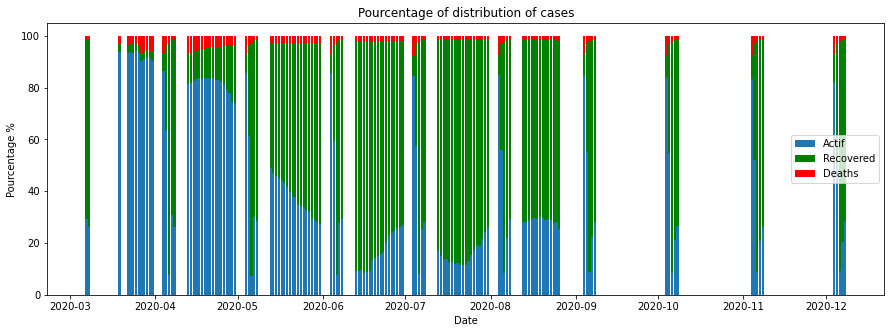

In [14]:
# getting the data that we want to plot
plt.figure(figsize=(15,5))
dataVar1 =(df_ori['Actif']*100/df_ori['Confirmed'])[15:]
dataVar3 =(df_ori['Deaths']*100/df_ori['Confirmed'])[15:]
dataVar2 =(df_ori['Recovered']*100/df_ori['Confirmed'])[15:]


# plot each data
p1 = plt.bar(dataVar1.index, 
             dataVar1,label='Actif')

p2 = plt.bar(dataVar2.index, 
             dataVar2,
             bottom=dataVar1,color='g',label='Recovered')

p3 = plt.bar(dataVar3.index,
             dataVar3,
             bottom=dataVar1+dataVar2,color='r',label='Deaths')

plt.xlabel('Date')
plt.ylabel('Pourcentage %')
plt.title('Pourcentage of distribution of cases')
plt.legend()

In [23]:
df.head()

,Confirmed,Deaths,Recovered,Excluded,Beni Mellal-Khenifra,Casablanca-Settat,Draa-Tafilalet,Dakhla-Oued Ed-Dahab,Fes-Meknes,Guelmim-Oued Noun,Laayoune-Sakia El Hamra,Marrakesh-Safi,Oriental,Rabat-Sale-Kenitra,Souss-Massa,Tanger-Tetouan-Al Hoceima,Actif,Total Test
Date,,,,,,,,,,,,,,,,,,
2020-01-04,654.0,39.0,29.0,2691.0,21.0,181.0,20.0,0.0,110.0,1.0,2.0,115.0,29.0,113.0,17.0,45.0,586.0,3345.0
2020-01-05,4569.0,171.0,1083.0,32437.0,83.0,1157.0,546.0,2.0,573.0,29.0,4.0,1004.0,175.0,326.0,51.0,619.0,3315.0,37006.0
2020-01-06,7833.0,205.0,5893.0,213721.0,119.0,2649.0,585.0,4.0,1001.0,43.0,4.0,1338.0,187.0,702.0,89.0,1103.0,1735.0,221554.0
2020-01-07,12636.0,228.0,9026.0,685492.0,152.0,3450.0,587.0,16.0,1292.0,75.0,535.0,1953.0,212.0,1973.0,93.0,2304.0,3382.0,698128.0
2020-01-08,25015.0,367.0,17960.0,1248924.0,276.0,6377.0,678.0,83.0,3858.0,161.0,839.0,3718.0,468.0,2522.0,136.0,5907.0,6688.0,1273939.0


Slice: [21.0, 181.0, 20.0, 0.0, 110.0, 1.0, 113.0, 17.0, 45.0, 2.0, 115.0, 29.0]


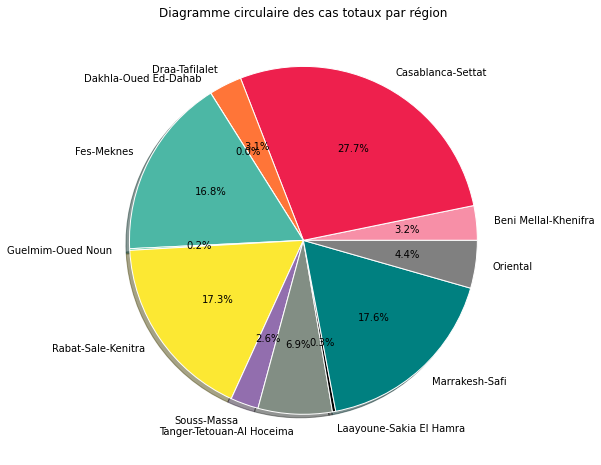

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sélectionnez les premièrs valeurs de chaque région
Slice = [
    df['Beni Mellal-Khenifra'].iloc[0],
    df['Casablanca-Settat'].iloc[0],
    df['Draa-Tafilalet'].iloc[0],
    df['Dakhla-Oued Ed-Dahab'].iloc[0],
    df['Fes-Meknes'].iloc[0],
    df['Guelmim-Oued Noun'].iloc[0],
    df['Rabat-Sale-Kenitra'].iloc[0],
    df['Souss-Massa'].iloc[0],
    df['Tanger-Tetouan-Al Hoceima'].iloc[0],
    df['Laayoune-Sakia El Hamra'].iloc[0],
    df['Marrakesh-Safi'].iloc[0],
    df['Oriental'].iloc[0]
]

# Noms des régions pour les labels
Labels = [
    'Beni Mellal-Khenifra', 'Casablanca-Settat', 'Draa-Tafilalet', 'Dakhla-Oued Ed-Dahab', 'Fes-Meknes',
    'Guelmim-Oued Noun', 'Rabat-Sale-Kenitra', 'Souss-Massa', 'Tanger-Tetouan-Al Hoceima',
    'Laayoune-Sakia El Hamra', 'Marrakesh-Safi', 'Oriental'
]

# Couleurs pour chaque secteur
Colors = [
    '#f78fA7', '#EE204D', '#FF7538', '#1F75FE', '#4CB7A5', '#1CAC78', '#FCE833', '#926EAE', '#828E84',
    '#000000', '#008080', '#808080'
]

# Aucune explosion pour chaque secteur
Explode = [0] * len(Labels)

# Vérifiez les valeurs sélectionnées
print("Slice:", Slice)

# Création du pie chart
plt.figure(figsize=(16, 8))
plt.pie(Slice, colors=Colors, explode=Explode, shadow=True, autopct='%1.1f%%',
        labels=Labels, wedgeprops={'edgecolor': 'white'})

plt.title('Diagramme circulaire des cas totaux par région')
plt.show()

In [ ]:
!pip install fbprophet 

In [ ]:
!pip install pystan

In [ ]:
pip install prophet

In [25]:
from prophet import Prophet

In [26]:
total_Deaths = df['Deaths']
total_Confirmed = df['Confirmed']
total_Recovered = df['Recovered']
mortaloty_rate = 100*total_Deaths/total_Confirmed

In [28]:
new_cases = []
for i in range(len(total_Confirmed)):
    if i == 0:
        new_cases.append(0)
    elif total_Confirmed[i] < total_Confirmed[i-1]:
        new_cases.append(0)
    else:
        temp = int(total_Confirmed[i] - total_Confirmed[i-1])
        new_cases.append(temp)
    
new_cases = np.array(new_cases)
df['New cases'] = new_cases

In [31]:
import pandas as pd

# Assurez-vous que 'df' contient vos données avec une colonne 'New cases'

# Exemple de création de DataFrame 'data' avec une colonne 'New cases'
data = pd.DataFrame(df['New cases'].values, columns=['New cases'])

# Appliquez le style avec gradient de couleur
styled_data = data.style.background_gradient(cmap='Reds')

# Affichez le résultat
styled_data


,New cases
0,0
1,3915
2,3264
3,4803
4,12379
5,0
6,707
7,4021
8,3137
9,5103


In [35]:
import plotly.express as px
import plotly.graph_objects as go


fig = px.bar(df, x=df.index, y="New cases", color='New cases', orientation='v', height=600,
             title='Confirmed Cases in Morocco', color_discrete_sequence = px.colors.cyclical.IceFire)
fig.show()

fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y = df['Confirmed'], mode= 'lines+markers',name='Total Cases'))
fig.add_trace(go.Scatter(x=df.index, y = df['Recovered'], mode='lines+markers',name='Recovered',line=dict(color='Green', width=2)))
fig.add_trace(go.Scatter(x=df.index, y=df['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.update_layout(title_text='Trend of Coronavirus Cases in Morocco (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')

fig.show()

fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y = df['Actif'], mode= 'lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Actif Coronavirus Cases in Morocco ',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

Predecting the trend of confirmed cases in the next 20 Days

In [36]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()

confirmed.columns = ['ds','y']

In [49]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=20)
future.tail(20)

19:13:51 - cmdstanpy - INFO - Chain [1] start processing
19:13:52 - cmdstanpy - INFO - Chain [1] done processing


,ds
179,2020-12-09
180,2020-12-10
181,2020-12-11
182,2020-12-12
183,2020-12-13
184,2020-12-14
185,2020-12-15
186,2020-12-16
187,2020-12-17
188,2020-12-18


In [38]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
184,2020-12-14,24700.494268,1690.764586,47209.144780
185,2020-12-15,25870.067010,1573.612055,49788.797827
186,2020-12-16,27259.469557,3359.570975,51228.366450
187,2020-12-17,23326.220887,269.740714,47183.100790
188,2020-12-18,23755.533759,1370.962562,48787.356319


In [39]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=forecast.ds, y = abs(forecast['yhat'].round()), mode= 'lines+markers',name='Predicted daily cases'))
fig.add_trace(go.Scatter(x=forecast.ds, y = abs(forecast['yhat_lower'].round()), mode= 'markers',name='Predicted daily cases yhat_lower'))
fig.add_trace(go.Scatter(x=forecast.ds, y = abs(forecast['yhat_upper'].round()), mode= 'markers',name='Predicted daily cases yhat_upper'))

fig.add_trace(go.Scatter(x=df.index, y = df['Confirmed'], mode= 'lines+markers',name='Daily cases'))

In [40]:
new_cases = df.groupby('Date').sum()['New cases'].reset_index()
new_cases.columns = ['ds','y']

In [41]:
m_1 = Prophet(interval_width=0.95)
m_1.fit(new_cases)
future_1 = m_1.make_future_dataframe(periods=10)
future_1.tail()

18:47:35 - cmdstanpy - INFO - Chain [1] start processing
18:47:35 - cmdstanpy - INFO - Chain [1] done processing


,ds
184,2020-12-14
185,2020-12-15
186,2020-12-16
187,2020-12-17
188,2020-12-18


In [42]:
forecast_1 = m_1.predict(future_1)
forecast_1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
184,2020-12-14,4164.700373,-3335.633001,12558.226130
185,2020-12-15,4935.891937,-3370.210192,12561.274079
186,2020-12-16,5223.575018,-3342.451512,13102.674952
187,2020-12-17,4222.357919,-3382.709162,11985.026667
188,2020-12-18,4018.852381,-3780.631301,12035.166791


In [43]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=forecast_1.ds, y = abs(forecast_1['yhat'].round()), mode= 'lines+markers',name='Predicted daily cases'))

fig.add_trace(go.Scatter(x=df.index, y = df['New cases'], mode= 'lines+markers',name='Daily cases'))

In [44]:
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
deaths.columns = ['ds','y']

In [45]:
m_2 = Prophet(interval_width=0.95)
m_2.fit(deaths)
future_2 = m_2.make_future_dataframe(periods=10)
future_2.tail()

18:49:02 - cmdstanpy - INFO - Chain [1] start processing
18:49:02 - cmdstanpy - INFO - Chain [1] done processing


,ds
184,2020-12-14
185,2020-12-15
186,2020-12-16
187,2020-12-17
188,2020-12-18


In [46]:
forecast_2 = m_2.predict(future_2)
forecast_2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
184,2020-12-14,402.674349,39.004245,782.412536
185,2020-12-15,415.461536,74.512060,787.959710
186,2020-12-16,443.527085,86.128380,814.710864
187,2020-12-17,380.957196,-4.872968,729.067173
188,2020-12-18,383.955281,25.723896,722.841799


In [48]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=forecast_2.ds, y = abs(forecast_2['yhat'].round()), mode= 'lines+markers',name='Predicted total deaths'))

fig.add_trace(go.Scatter(x=df.index, y = df['Deaths'], mode= 'lines+markers',name='Daily cases'))


# Conclusion

L'utilisation de Prophet offre une méthode robuste et efficace pour la prévision des séries chronologiques, en particulier celles avec des effets saisonniers prononcés et une longue histoire de données. Grâce à son modèle additif et à sa capacité à gérer les données manquantes et les valeurs aberrantes, Prophet se positionne comme un outil précieux pour analyser et anticiper les tendances temporelles, offrant ainsi des perspectives précieuses pour la planification et la prise de décision dans divers domaines.